#                                           0184939-孟瑶-实验报告

## 第一步 获取pdf的名称

In [1]:
import os
names = os.listdir("2019")
len(names)

39

## 第二步 获取信息（股票简称、股票代码、公司的法定代表人、办公地址、公司网址、电子信箱

## 以及最近三年经营活动产生的现金流量净额（元）

In [2]:
import pdfplumber

dicts = {'股票简称':[],
        '股票代码':[],
        '公司的法定代表人':[],
        '办公地址':[],
        '公司网址':[],
        '电子信箱':[]
        }
dicts2 = {'股票简称':[],
          '2019':[],
         '2018':[],
         '2017':[]
         }
ind = ['股票简称','公司的法定代表人','办公地址 ','公司国际互联网网址','电子信箱']
ind2 = ['股票简称','股票代码','公司的法定代表人','办公地址','公司国际互联网网址','电子信箱']
ind3 = ['经营活动产生的现金流量净额']
for count in range(20):
    with pdfplumber.open("2019/"+names[count]) as pdf:
        lis = []
        pag = 1
        # 只获取包含数据的两页
        for page in pdf.pages:
            text = page.extract_text()
            if text != None:
                lis.append(text)
            if pag == 16:
                break
            pag += 1
        # 获取基本数据
        new = "".join(lis).split("\n")
        index = 0
        temp = []
        isTrue = False
        for i in new:
            if i.startswith(ind[index]):
                index += 1
                i = i.split(" ")
                # 列表推导式去除空元素
                i = [j for j in i if len(j)>0]
                if len(i)%2 != 0:
                    isTrue = False
                    break
                for j in range(len(i)):
                    if i[j] in ind2:
                        temp.append(i[j+1])
                isTrue = True
            if index == len(ind):
                break
        # 获取经济数据
        if isTrue:
            temp2 = []
            for index in range(len(new)):
                if new[index].startswith(ind3[0]):
                    temp2 += new[index].split(" ")
                    temp2 += new[index+1].split(" ")
                    # 列表推导式去除空元素
                    temp2 = [j for j in temp2 if len(j)>0]
                    break
        print("2019/"+names[count])
        # 不满足格式的跳过
        if len(temp) != 6:
            continue
        # 添加进字典
        index = 0
        for key in dicts:
            dicts[key].append(temp[index])
            index += 1
        if isTrue:
            dicts2['股票简称'].append(temp[0])
            dicts2['2019'].append(temp2[1])
            dicts2['2018'].append(temp2[2])
            dicts2['2017'].append(temp2[4])

2019/300081：2019年年度报告.pdf
2019/300161：2019年年度报告.pdf
2019/300169：2019年年度报告.pdf
2019/300174：2019年年度报告.pdf
2019/300214：2019年年度报告.pdf
2019/300235：2019年年度报告.pdf
2019/300291：2019年年度报告.pdf
2019/300316：2019年年度报告.pdf
2019/300363：2019年年度报告.pdf
2019/300370：2019年年度报告.pdf
2019/300428：2019年年度报告.pdf
2019/300442：2019年年度报告.pdf
2019/300451：2019年年度报告.pdf
2019/300460：2019年年度报告.pdf
2019/300492：2019年年度报告.pdf
2019/300502：2019年年度报告.pdf
2019/300504：2019年年度报告.pdf
2019/300505：2019年年度报告.pdf
2019/300519：2019年年度报告.pdf
2019/300528：2019年年度报告.pdf


## 第三步  利用表格分别展示各公司的股票简称、股票代码、公司的法定代表人、办公地址、公司网址、电子信箱

In [3]:
from IPython.display import display, HTML
from pandas import DataFrame
df = DataFrame(dicts)
print("df:")
display(df)

df:


股票简称    股票代码 公司的法定代表人                                      办公地址  \
0   恒信东方  300081      孟宪民                     北京市海淀区蓝靛厂南路牛顿办公区北区11层   
1   华中数控  300161      陈吉红                             武汉市东湖开发区华工科技园   
2   元力股份  300174      许文显                           福建省南平市陈坑至瓦口工业园区   
3   方直科技  300235      黄元忠                     深圳市南山区大新路198号创新大厦B座9楼   
4   华录百纳  300291       方刚                         北京市朝阳区安家楼50号院A7-2   
5   晶盛机电  300316      曹建伟                      浙江省杭州市余杭区五常街道创智一号2号楼   
6   博腾股份  300363      居年丰  重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
7   安控科技  300370      许永良                           北京市海淀区地锦路9号院6号楼   
8   四通新材  300428      臧立国                            保定市清苑区发展西街359号   
9    普丽盛  300442      姜卫东                          上海市金山区张堰镇金张支路84号   
10  创业慧康  300451       葛航                  杭州市滨江区长河街道越达巷92号创业智慧大厦五楼   
11  惠伦晶体  300460      赵积清                         广东省东莞市黄江镇黄江东环路68号   
12  山鼎设计  300492       陈栗                    成都市锦江区东大街芷泉段6号1栋1单元37层   
13   新易盛  300502      高光荣                         成都市双流区公兴镇物联西街127号   
14  天邑股份  300504      李世宏                       四川省大邑县晋原镇雪山大道一段198号   
15   川金诺  300505       刘甍                      云南省昆明市呈贡区上海东盟大厦A座10楼   
16  幸福蓝海  300528      蒋小平                            南京市栖霞区元化路8号28幢   

                           公司网址                         电子信箱  
0         http://www.hxgro.com/             office@hxgro.com  
1           www.huazhongcnc.com               hcnc@hzncc.com  
2          www.yuanlicarbon.com          dm@yuanlicarbon.com  
3            www.kingsunedu.com  kingsunsoft@kingsunsoft.com  
4           http://www.hlbn.cc/               hbndsh@hlbn.cc  
5           http://www.jsjd.cc/                 jsjd@jsjd.cc  
6          http://www.porton.cn          porton.db@porton.cn  
7                 www.etrol.com               info@etrol.com  
8        http://www.stnm.com.cn             info@stnm.com.cn  
9                www.cn-pls.com               pls@cn-pls.com  
10    https://www.bsoft.com.cn/           bsoft@bsoft.com.cn  
11        http://www.dgylec.com                yl@dgylec.com  
12  http://www.cendes-arch.com/   cendes.bso@cendes-arch.com  
13            www.eoptolink.com             ir@eoptolink.com  
14             www.tianyisc.com            tykh@tianyisc.com  
15       http://www.cjnphos.com              cjncc61@163.com  
16       http://www.omnijoi.com            board@omnijoi.com

## 第四步  利用表格分别展示各公司的最近三年经营活动产生的现金流量净额（元）

In [4]:
df = DataFrame(dicts2)
print("df:")
display(df)

df:


股票简称             2019             2018             2017
0   恒信东方  -128,602,623.54     4,015,174.12   -83,277,810.06
1   华中数控    -7,706,529.47   133,781,403.75  -156,320,029.48
2   方直科技    24,284,385.48    12,605,499.78     3,960,735.89
3   华录百纳   110,408,056.93   137,869,021.38    70,961,621.73
4   晶盛机电   778,798,470.40   165,622,308.33  -152,914,455.76
5   博腾股份   351,373,889.80   193,617,828.06   290,958,495.84
6   安控科技   232,986,504.08  -225,953,245.64  -430,024,950.20
7   四通新材   605,197,255.04   633,577,583.86   272,422,955.37
8    普丽盛   -79,186,127.70   -55,575,707.30    20,808,239.50
9   创业慧康    80,158,689.37   169,697,618.08   175,466,341.65
10  惠伦晶体     5,267,505.57    68,080,634.73   106,199,258.97
11  山鼎设计    31,042,146.51    87,018,747.28    14,869,805.58
12   新易盛   109,475,914.46   320,626,742.05   -72,936,174.03
13  天邑股份   139,367,095.54   152,925,141.43    76,631,650.57
14   川金诺   122,139,938.64   112,544,821.66    95,983,168.67
15  幸福蓝海   259,150,518.79  -149,202,188.47   308,815,278.72

In [5]:
dicts2.pop('股票简称')

['恒信东方',
 '华中数控',
 '方直科技',
 '华录百纳',
 '晶盛机电',
 '博腾股份',
 '安控科技',
 '四通新材',
 '普丽盛',
 '创业慧康',
 '惠伦晶体',
 '山鼎设计',
 '新易盛',
 '天邑股份',
 '川金诺',
 '幸福蓝海']

## 第五步 绘画matplotlib

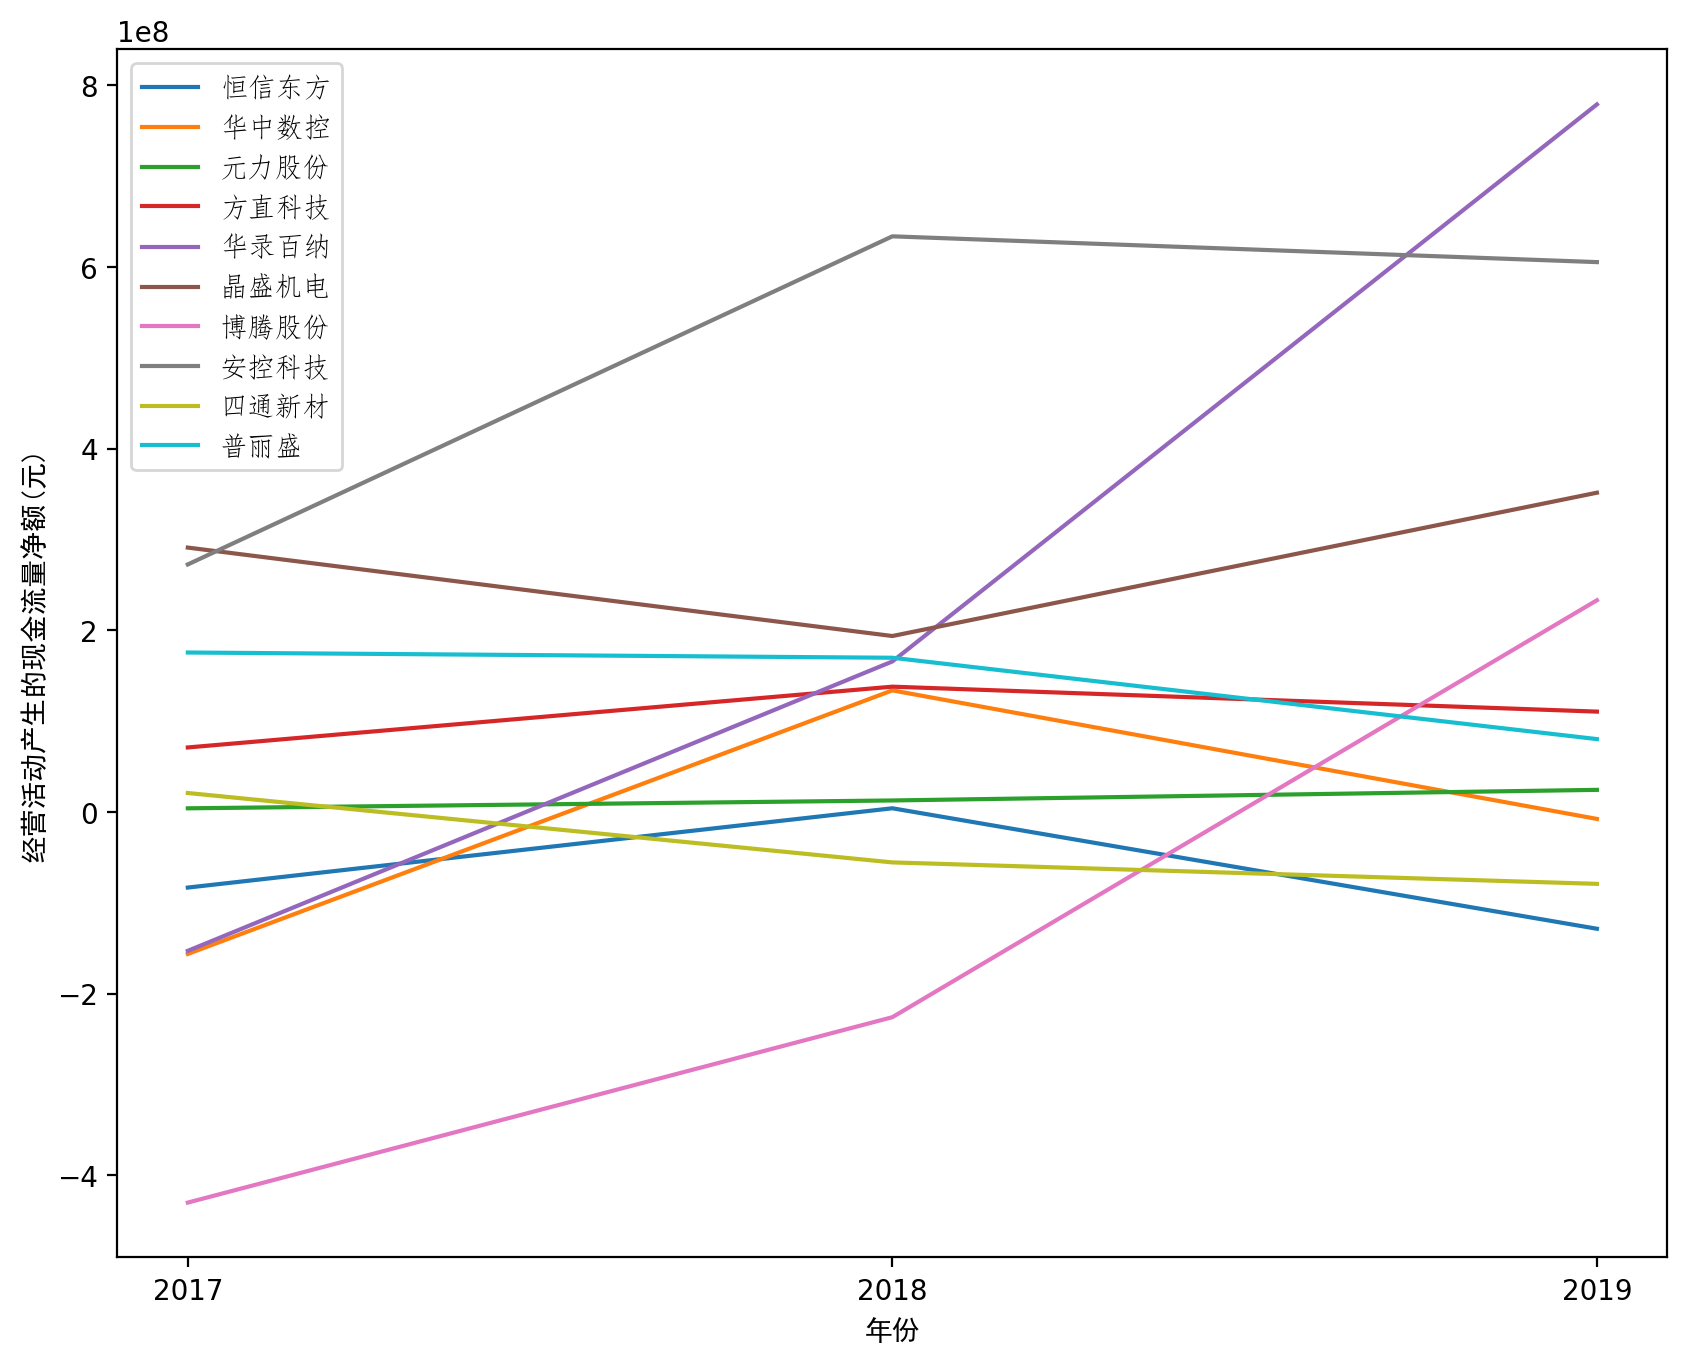

In [8]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from re import sub

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 200
for i in range(10):
    year = []
    for key in dicts2:
        k=1
        val = float(sub(r'[^\d.]', '', dicts2[key][i]))
        if dicts2[key][i][0] == '-':
            k=-1
        year.append(val*k)
    
    plt.plot(['2017','2018','2019'],year[::-1],label=dicts['股票简称'][i])
plt.xlabel('年份',fontproperties='simhei')
plt.ylabel('经营活动产生的现金流量净额(元)',fontproperties='simhei')
myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\simfang.ttf')
plt.legend(prop=myfont)
plt.show()


## 第六步 总结规律

### 从图中我们可以看到：

### （1）博腾股份、华录百纳两家公司从17年开始经营现金流净额呈现持续增长的趋势。

### （2）安控科技公司在17-18年经营现金流净额持续增长，18-19年有轻微的下降趋势。

### （3）晶盛机电公司在17-18经营现金流净额有轻微下降趋势，18-19逐渐开始增长。

### （4）剩余6家公司17-19年经营现金流净额变化幅度不大，保持平稳趋势。

### （5）在2017-2018年，累计有6家公司经营现金流净额为负，说明应收账款减少，且公司可能在新建厂房、增加设备、扩大生产、存货增长，企业账款回收尚可，但原材料购置用资金量大于贷款回收量。说明在这一阶段公司可能投入大量资金，形成生产能力，开拓市场。

### （6）在2018-2019年，之前6家经营现金流净额为负的公司有4家经营现金流净额变为了正数，说明该阶段这几家公司逐渐盈利，产品销售市场稳定，可能已经进入投资回收期，但很多外部资金需要偿还，以保持企业良好的资信程度。